#Estimating number of passengers

In [38]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2022-08-23 13:24:56--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-08-23 13:24:57 (43.4 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [39]:
import pandas as pd

data = pd.read_csv('airline-passengers.csv', usecols=['Passengers'])

In [44]:
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


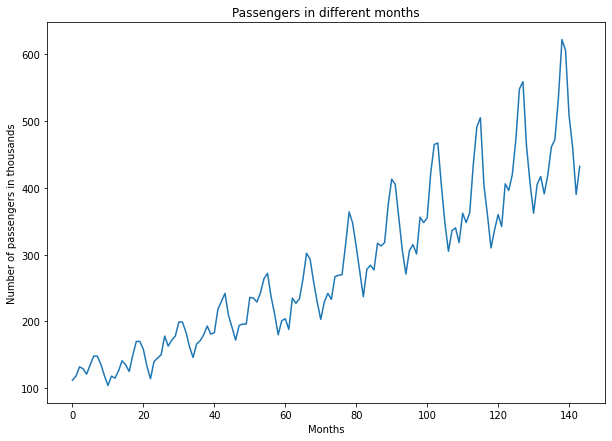

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(data)
plt.xlabel('Months')
plt.ylabel('Number of passengers in thousands')
plt.title('Passengers in different months');

In [135]:
def train_test_split(data, look_back):
  x, y = [], []
  for i in range(len(data) - look_back - 1):
    x.append(data[i:i+look_back])
    y.append(data[i+look_back])
  print(len(x), len(y))
  # Split 80/20
  border_x, border_y = int(len(x) * .8), int(len(y) * .8)
  x_train, x_test = x[:border_x], x[border_x:]
  y_train, y_test = y[:border_y], y[border_y:]
  return x_train, x_test, y_train, y_test

In [136]:
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(data.values, 2)

X_train = tf.squeeze(tf.constant(X_train))
X_test = tf.squeeze(tf.constant(X_test))
y_train = tf.squeeze(tf.constant(y_train))
y_test = tf.squeeze(tf.constant(y_test))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

141 141


(TensorShape([112, 2]),
 TensorShape([29, 2]),
 TensorShape([112]),
 TensorShape([29]))

In [140]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=5,
                                                       restore_best_weights=True)

history_model = model.fit(X_train,
                          y_train,
                          epochs=1000,
                          validation_data=(X_test, y_test),
                          callbacks=[early_stop_callback])

Epoch 1/1000
4/4 [==============================] - 1s 136ms/step - loss: 312.1995 - mae: 312.1995 - val_loss: 565.2068 - val_mae: 565.2068
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 302.4538 - mae: 302.4538 - val_loss: 546.9792 - val_mae: 546.9792
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 292.9304 - mae: 292.9304 - val_loss: 528.6366 - val_mae: 528.6366
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 283.0746 - mae: 283.0746 - val_loss: 510.3058 - val_mae: 510.3058
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 273.2804 - mae: 273.2804 - val_loss: 491.8814 - val_mae: 491.8814
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 263.1871 - mae: 263.1871 - val_loss: 473.3987 - val_mae: 473.3987
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 253.4738 - mae: 253.4738 - val_loss: 454.6706 - val_mae: 454.6706
Epoch 8/1000
4/4 [==========

In [141]:
train_pred = model.predict(X_train)
test_pred = tf.squeeze(model.predict(X_test))

In [142]:
len(train_pred), len(test_pred)

(112, 29)

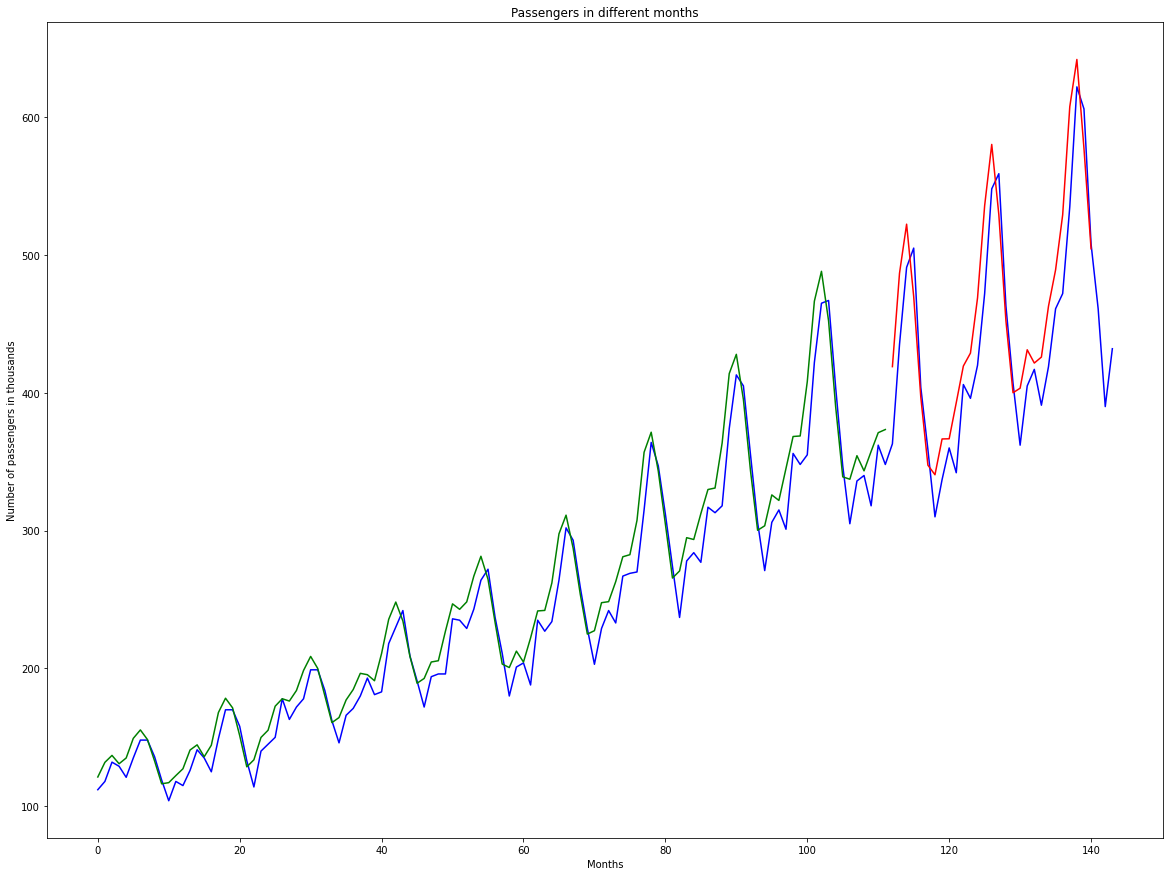

In [143]:
plt.figure(figsize=(20, 15))
plt.plot(data, c='b')
plt.plot(train_pred, c='g')
plt.plot(range(112, 141), test_pred, c='r')
plt.xlabel('Months')
plt.ylabel('Number of passengers in thousands')
plt.title('Passengers in different months');